In [33]:
import numpy as np
import pandas as pd
from pandas.compat import StringIO
from datetime import datetime
import matplotlib.pyplot as plt

** Read .dat file **

In [2]:
df = pd.read_csv('SNF_nuclide_2020_07_01.dat',sep='\s+',index_col = False)


In [6]:
date_isotope_mass = df[['discharge_date','name','total_mass_g']]

In [11]:
table = date_isotope_mass.pivot_table(index='discharge_date',columns='name',aggfunc=sum)

In [44]:
table

total_mass_g                                            \
name                  ac-227       ag-108m       ag-110m        am-241   
discharge_date                                                           
1968-06-21      3.023300e-07  1.593722e-07  1.478946e-26      6.566866   
1969-04-18      4.555560e-08  7.851460e-07  1.678221e-25     21.903593   
1969-09-06      3.143973e-06  9.234351e-04  1.444471e-22   7737.652222   
1969-10-14      7.362290e-08  1.737110e-08  4.363582e-27      0.625914   
1970-04-17      8.957648e-06  1.123117e-03  4.781970e-22  20782.085680   
1970-06-05      1.841099e-06  3.926630e-08  5.205747e-26      3.116541   
1970-10-02      7.616395e-06  8.038441e-04  5.333301e-22  15888.627530   
1971-02-04      2.141955e-06  2.312688e-05  2.973439e-23    833.388023   
1971-02-12      3.583545e-07  8.941749e-06  9.676309e-24    179.430768   
1971-02-26      1.305617e-05  1.274117e-05  2.201240e-23    612.798988   
1971-04-16      9.898955e-06  2.390440e-03  2.281371e-21  27918.587130   
1971-06-05      1.057949e-06  2.918342e-05  3.610813e-22   1524.692835   
1971-09-10      4.261761e-06  1.344088e-03  1.348546e-21  10350.280440   
1971-09-18      2.241541e-06  1.093383e-04  2.401084e-22   2609.454201   
1971-12-25      9.165970e-06  1.769953e-03  3.243565e-21  21695.591390   
1972-02-12      6.601645e-06  5.114968e-04  7.590528e-23   8998.043270   
1972-02-19      2.807257e-05  3.166260e-04  1.170178e-21  10509.233331   
1972-03-18      2.329079e-06  1.843584e-04  5.817096e-22   2367.301178   
1972-04-02      1.769692e-06  8.377664e-05  2.625607e-22   1912.627540   
1972-04-14      9.295807e-06  7.776167e-04  2.646491e-21  13686.181347   
1972-05-01      7.146855e-06  1.100871e-03  3.677407e-21  15026.954582   
1972-06-10      1.287012e-05  3.191770e-03  8.334604e-21  31237.416260   
1972-08-19      4.667374e-07  1.345323e-05  4.020470e-23    253.269834   
1972-08-25      1.511671e-06  4.515607e-05  1.716205e-21   2314.401459   
1972-09-01      1.451156e-06  8.346028e-05  4.740786e-22   1983.798037   
1972-09-30      4.126588e-06  1.040506e-03  6.469177e-21  16570.103570   
1972-10-06      5.468916e-06  1.471116e-03  7.064796e-21  18435.925060   
1972-12-29      5.637225e-06  5.756001e-04  1.450947e-22   8833.864520   
1973-01-17      5.439397e-07  1.586160e-07  1.913286e-24      6.752576   
1973-02-06      1.257852e-05  2.675080e-03  1.334187e-20  27667.285200   
...                      ...           ...           ...           ...   
2012-10-27      3.226615e-06  1.179686e-02  2.066758e-02  22896.080740   
2012-10-31      2.561431e-06  6.643847e-03  1.054807e-02  13770.119140   
2012-11-01      2.860526e-06  8.188750e-03  1.498334e-02  18377.773380   
2012-11-05      3.088225e-06  9.103233e-03  1.662936e-02  20686.489380   
2012-11-12      5.930487e-06  1.841567e-02  2.445110e-02  25531.221992   
2012-11-24      4.430886e-06  1.455545e-02  2.794036e-02  29221.126510   
2013-02-03      5.276783e-06  1.332639e-02  3.260000e-02  27012.342450   
2013-02-04      4.871392e-06  1.386995e-02  3.365670e-02  32009.390190   
2013-02-11      1.150960e-05  3.899839e-02  7.443002e-02  54252.320960   
2013-02-16      4.922413e-06  1.098504e-02  2.155798e-02  21231.379843   
2013-02-17      4.985721e-06  1.292487e-02  2.851896e-02  25111.420230   
2013-03-02      8.821436e-06  2.697335e-02  5.222434e-02  37782.321279   
2013-03-04      5.177065e-06  1.489631e-02  3.679714e-02  29545.333200   
2013-03-10      5.907207e-06  2.149570e-02  5.608506e-02  37519.577008   
2013-03-11      6.144265e-06  1.915488e-02  3.528123e-02  25801.014765   
2013-03-14      7.577166e-06  1.946880e-02  3.836499e-02  30496.148794   
2013-03-16      3.714895e-06  1.368944e-02  3.564236e-02  25699.407820   
2013-03-18      8.705129e-06  2.842171e-02  6.199270e-02  43951.788978   
2013-03-24      2.602051e-06  9.084015e-03  2.295247e-02  18723.455270   
2013-03-25      6.516521e-06  2.445004e-02  4.836700e-02  29813.976891   
2013-03-27      2.89

Text(0,0.5,'Total mass (g)')

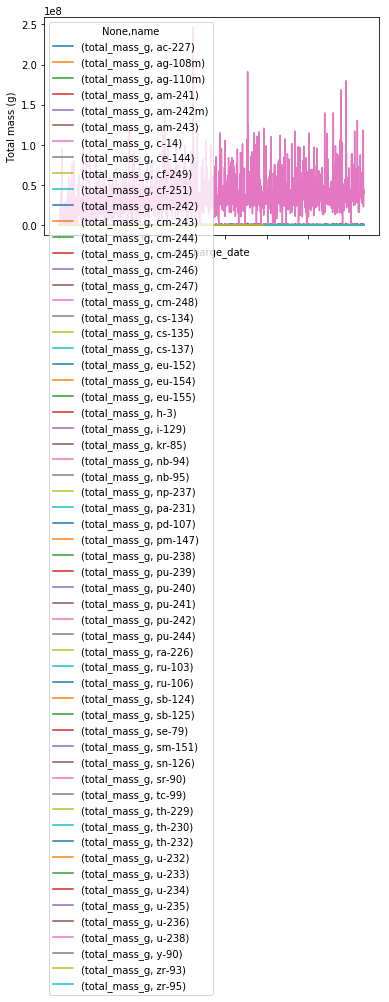

In [52]:
table.plot()
plt.ylabel('Total mass (g)')

In [50]:
unique_dates = table.index.unique()
for date in unique_dates: 
    print(date)


1968-06-21
1969-04-18
1969-09-06
1969-10-14
1970-04-17
1970-06-05
1970-10-02
1971-02-04
1971-02-12
1971-02-26
1971-04-16
1971-06-05
1971-09-10
1971-09-18
1971-12-25
1972-02-12
1972-02-19
1972-03-18
1972-04-02
1972-04-14
1972-05-01
1972-06-10
1972-08-19
1972-08-25
1972-09-01
1972-09-30
1972-10-06
1972-12-29
1973-01-17
1973-02-06
1973-03-02
1973-03-03
1973-03-16
1973-03-30
1973-04-13
1973-04-14
1973-07-08
1973-08-12
1973-09-01
1973-09-29
1973-10-08
1973-11-03
1973-12-29
1974-01-01
1974-03-11
1974-03-15
1974-03-23
1974-03-31
1974-04-06
1974-04-13
1974-05-04
1974-05-11
1974-06-02
1974-06-29
1974-08-30
1974-08-31
1974-10-12
1974-10-14
1974-10-16
1974-10-19
1974-10-24
1974-10-31
1974-11-02
1974-12-21
1975-01-09
1975-01-10
1975-02-08
1975-03-10
1975-03-13
1975-03-29
1975-04-16
1975-04-26
1975-05-02
1975-05-09
1975-05-17
1975-05-30
1975-06-06
1975-09-01
1975-09-12
1975-09-14
1975-09-26
1975-10-03
1975-10-18
1975-10-26
1975-10-31
1975-11-16
1975-12-20
1975-12-27
1976-01-03
1976-01-27
1976-01-29

1998-05-02
1998-05-29
1998-09-04
1998-09-05
1998-09-09
1998-09-13
1998-09-19
1998-09-20
1998-09-21
1998-09-26
1998-09-30
1998-10-03
1998-10-04
1998-10-08
1998-10-16
1998-10-19
1998-10-24
1998-11-07
1998-11-09
1998-12-04
1998-12-05
1999-01-02
1999-01-09
1999-01-30
1999-02-07
1999-02-13
1999-02-19
1999-02-26
1999-02-27
1999-03-01
1999-03-12
1999-03-15
1999-03-20
1999-03-26
1999-03-27
1999-04-02
1999-04-03
1999-04-11
1999-04-16
1999-04-17
1999-04-18
1999-04-22
1999-04-24
1999-05-01
1999-05-08
1999-05-20
1999-09-10
1999-09-11
1999-09-12
1999-09-13
1999-09-17
1999-09-18
1999-09-25
1999-09-26
1999-09-29
1999-10-01
1999-10-02
1999-10-03
1999-10-13
1999-10-15
1999-10-16
1999-10-22
1999-10-23
1999-10-29
1999-11-04
2000-01-06
2000-01-21
2000-02-15
2000-02-22
2000-02-26
2000-02-28
2000-03-01
2000-03-03
2000-03-04
2000-03-10
2000-03-11
2000-03-12
2000-03-18
2000-03-29
2000-04-01
2000-04-13
2000-04-14
2000-04-15
2000-04-16
2000-04-21
2000-04-22
2000-04-28
2000-06-05
2000-09-01
2000-09-10
2000-09-15

In [38]:
table.plot(x='discharge_date', y='h-3', style='o')

KeyError: 'discharge_date'

In [24]:
index = table.index 
column = table.columns
print(index)
print(column)

Index(['1968-06-21', '1969-04-18', '1969-09-06', '1969-10-14', '1970-04-17',
       '1970-06-05', '1970-10-02', '1971-02-04', '1971-02-12', '1971-02-26',
       ...
       '2013-03-27', '2013-03-29', '2013-03-30', '2013-04-07', '2013-04-08',
       '2013-04-13', '2013-04-14', '2013-04-15', '2013-05-07', '2013-05-11'],
      dtype='object', name='discharge_date', length=1838)
MultiIndex(levels=[['total_mass_g'], ['ac-227', 'ag-108m', 'ag-110m', 'am-241', 'am-242m', 'am-243', 'c-14', 'ce-144', 'cf-249', 'cf-251', 'cm-242', 'cm-243', 'cm-244', 'cm-245', 'cm-246', 'cm-247', 'cm-248', 'cs-134', 'cs-135', 'cs-137', 'eu-152', 'eu-154', 'eu-155', 'h-3', 'i-129', 'kr-85', 'nb-94', 'nb-95', 'np-237', 'pa-231', 'pd-107', 'pm-147', 'pu-238', 'pu-239', 'pu-240', 'pu-241', 'pu-242', 'pu-244', 'ra-226', 'ru-103', 'ru-106', 'sb-124', 'sb-125', 'se-79', 'sm-151', 'sn-126', 'sr-90', 'tc-99', 'th-229', 'th-230', 'th-232', 'u-232', 'u-233', 'u-234', 'u-235', 'u-236', 'u-238', 'y-90', 'zr-93', 'zr-95']],
 

In [43]:
print(unique_dates)

['1990-09-05' '1992-03-04' '1993-10-01' ..., '2002-05-11' '2004-04-04'
 '2007-05-13']


In [3]:
ab = df.loc[(df['name'] == 'u-235') & (df['discharge_date'] == '1993-10-01')]

In [4]:
ab.pivot_table(index='discharge_date',columns='total_mass_g',aggfunc=sum)

assembly_id                                                    \
total_mass_g     1447.1510 1447.8102 1450.0516 1450.5299 1452.5228 1452.8154   
discharge_date                                                                 
1993-10-01          255284    255385    255283    255282    255387    255281   

                                                          ...     \
total_mass_g   1454.6513 1456.3091 1458.7620 1461.4672    ...      
discharge_date                                            ...      
1993-10-01        255388    255386    255288    255286    ...      

               total_radioactivity_curies                                \
total_mass_g                    6025.4720 6276.0075 6328.1119 6329.5769   
discharge_date                                                            
1993-10-01                       0.013018  0.013559  0.013672  0.013675   

                                                                            
total_mass_g   6348.6210 6362.5835 6362.6272 6371.3248 6393.2699 8660.3089  
discharge_date                                                              
1993-10-01      0.013716  0.013747  0.013747  0.013765  0.013813  0.018711  

[1 rows x 2338 columns]

In [9]:
unique_dates = df.discharge_date.unique()
# length of this ndarray = 1838

In [10]:
unique_dates

array(['1990-09-05', '1992-03-04', '1993-10-01', ..., '2002-05-11',
       '2004-04-04', '2007-05-13'], dtype=object)